In [1]:
# Import Modules and Packages. 
import numpy as np
import pandas as pd
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt  

from pathlib import Path

from sklearn import linear_model  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing 

import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline  

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Linear Regression & Predictions using Multiple Variables, Supervised Machine Learning Methods.

In [ ]:
# Read in cleansed data file 'data_drop.csv' from AWS S3 Bucket

url="https://project-4-group-6-air-quality.s3.us-east-2.amazonaws.com/data_drop.csv"
air3_data_df = pd.read_csv(
    url,
    sep=',',
    encoding='utf-8',
)

# Display sample data
air3_data_df.head()


In [3]:
type(air3_data_df)

pandas.core.frame.DataFrame

In [ ]:
# Rename Unnamed:0 column
air3_data_df.rename(columns ={"Unnamed: 0":"Number"})

In [5]:
air3_df=air3_data_df.drop(columns=["Unnamed: 0",'year','month','day','hour','wd'])
air3_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,5.7
1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,3.9
2,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,2.4
3,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,2.2
4,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
382163,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,1.3
382164,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,2.1
382165,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,1.5
382166,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,1.4


In [ ]:
air3_df.info()

In [ ]:
print(air3_df.columns)

In [8]:
# creating feature variables 
X = air3_df.drop('O3',axis= 1) 
y = air3_df['O3'] 
print(X) 
print(y)

        PM2.5  PM10   SO2   NO2     CO  TEMP    PRES  DEWP  RAIN  WSPM
0         9.0   9.0   3.0  17.0  300.0  -0.5  1024.5 -21.4   0.0   5.7
1         4.0   4.0   3.0  16.0  300.0  -0.7  1025.1 -22.1   0.0   3.9
2         4.0   4.0   9.0  25.0  300.0  -2.4  1027.5 -21.3   0.0   2.4
3         5.0   5.0  10.0  29.0  400.0  -2.5  1028.2 -20.4   0.0   2.2
4         3.0   6.0  12.0  40.0  400.0  -1.4  1029.5 -20.4   0.0   3.0
...       ...   ...   ...   ...    ...   ...     ...   ...   ...   ...
382163   11.0  11.0   2.0   2.0  200.0  11.7  1008.9 -13.3   0.0   1.3
382164   13.0  13.0   2.0   2.0  200.0  10.9  1009.0 -14.0   0.0   2.1
382165    9.0  14.0   2.0   2.0  200.0   9.5  1009.4 -13.0   0.0   1.5
382166   10.0  12.0   2.0   2.0  200.0   7.8  1009.6 -12.6   0.0   1.4
382167   13.0  16.0   4.0   9.0  500.0   7.0  1009.4 -12.2   0.0   1.9

[382168 rows x 10 columns]
0          89.0
1          88.0
2          78.0
3          67.0
4          52.0
          ...  
382163     99.0
382164  

Scatter Plot with Ozone (O3) and Temperature (TEMP)

In [9]:
# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=101) 

In [10]:
# creating a regression model 
model = LinearRegression() 

In [11]:
# fitting the model 
model.fit(X_train,y_train)

LinearRegression()

In [12]:
# making predictions 
predictions = model.predict(X_test)

In [13]:
# model evaluation 
print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

mean_squared_error :  1378.584450481671
mean_absolute_error :  27.07180456217113


In [ ]:
# Visualizing the relationships between features using pair plots  
sns.pairplot(data = air3_df, height = 2) 

Multicollinearity
The multiple linear regression model assumes no correlation exists between the predictors or the independent variables employed in the regression. Using the corr() method from the Pandas dataframe, we can compute the Pearson correlation coefficient value between every two features of our data and build a matrix to see whether there is any correlation between any predictors. After that, we can use Seaborn's heatmap() plot to display the matrix as a heatmap.

The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables

Pearson correlation coefficient matrix for each independent variable: 
           PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.884324  0.482209  0.670753  0.792041 -0.151149 -0.128907   
PM10   0.884324  1.000000  0.466561  0.653577  0.703535 -0.114345 -0.094793   
SO2    0.482209  0.466561  1.000000  0.501317  0.535289 -0.167093 -0.320991   
NO2    0.670753  0.653577  0.501317  1.000000  0.705651 -0.476812 -0.276387   
CO     0.792041  0.703535  0.535289  0.705651  1.000000 -0.315060 -0.323402   
O3    -0.151149 -0.114345 -0.167093 -0.476812 -0.315060  1.000000  0.597098   
TEMP  -0.128907 -0.094793 -0.320991 -0.276387 -0.323402  0.597098  1.000000   
PRES   0.013717 -0.021942  0.218994  0.172287  0.183800 -0.447437 -0.812456   
DEWP   0.118009  0.072706 -0.266446 -0.028276 -0.054173  0.313267  0.820672   
RAIN  -0.015268 -0.026885 -0.040618 -0.043946 -0.013302  0.023194  0.037182   
WSPM  -0.275686 -0.185789 -0.109259 -0.402566 -0.297760  0.

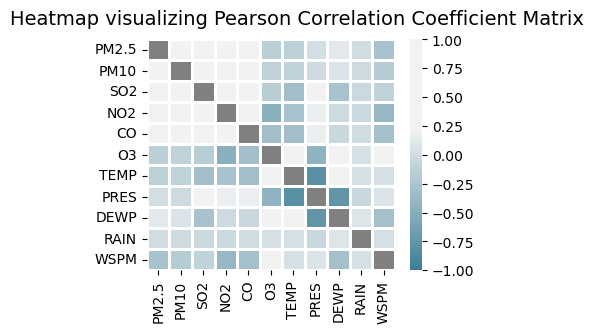

In [15]:
# Visualizing multicollinearity between independent features using a heatmap  
  
corr = air3_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM']].corr()  
print('Pearson correlation coefficient matrix for each independent variable: \n', corr)  
  
# Masking the diagonal cells   
masking = np.zeros_like(corr, dtype = bool)  
np.fill_diagonal(masking, val = True)  
  
# Initializing a matplotlib figure  
figure, axis = plt.subplots(figsize = (4, 3))  
  
# Generating a custom colormap  
c_map = sns.diverging_palette(223, 14, as_cmap = True, sep = 100)  
c_map.set_bad('grey')  
  
# Displaying the heatmap with the masking and the correct aspect ratio  
sns.heatmap(corr, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap visualizing Pearson Correlation Coefficient Matrix', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)  

In [16]:
# Building the Multiple Linear Regression Model  
  
# Setting the independent and dependent features  
X = air3_df.drop('O3',axis= 1) 
y = air3_df['O3']   
  
# Initializing the model class from the sklearn package and fitting our data into it  
reg = linear_model.LinearRegression()  
reg.fit(X, y)  
  
# Printing the intercept and the coefficients of the regression equation  
print('Intercept: ', reg.intercept_)  
print('Coefficients array: ', reg.coef_)  

Intercept:  -117.03237018427141
Coefficients array:  [ 1.57294634e-01  3.93318439e-02  2.84525105e-01 -7.97442020e-01
  1.33234639e-03  4.33588565e+00  1.31796078e-01 -1.58767871e+00
  8.68608179e-01  2.29319850e+00]


Predict CO

In [17]:
# creating feature variables 
X = air3_df.drop('CO',axis= 1) 
y = air3_df['CO'] 
print(X) 
print(y)

        PM2.5  PM10   SO2   NO2     O3  TEMP    PRES  DEWP  RAIN  WSPM
0         9.0   9.0   3.0  17.0   89.0  -0.5  1024.5 -21.4   0.0   5.7
1         4.0   4.0   3.0  16.0   88.0  -0.7  1025.1 -22.1   0.0   3.9
2         4.0   4.0   9.0  25.0   78.0  -2.4  1027.5 -21.3   0.0   2.4
3         5.0   5.0  10.0  29.0   67.0  -2.5  1028.2 -20.4   0.0   2.2
4         3.0   6.0  12.0  40.0   52.0  -1.4  1029.5 -20.4   0.0   3.0
...       ...   ...   ...   ...    ...   ...     ...   ...   ...   ...
382163   11.0  11.0   2.0   2.0   99.0  11.7  1008.9 -13.3   0.0   1.3
382164   13.0  13.0   2.0   2.0  101.0  10.9  1009.0 -14.0   0.0   2.1
382165    9.0  14.0   2.0   2.0  102.0   9.5  1009.4 -13.0   0.0   1.5
382166   10.0  12.0   2.0   2.0   97.0   7.8  1009.6 -12.6   0.0   1.4
382167   13.0  16.0   4.0   9.0   74.0   7.0  1009.4 -12.2   0.0   1.9

[382168 rows x 10 columns]
0         300.0
1         300.0
2         300.0
3         400.0
4         400.0
          ...  
382163    200.0
382164  

In [18]:
# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=101) 

In [19]:
model = LinearRegression() 
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [20]:
# model evaluation 
print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

mean_squared_error :  370530.05017968314
mean_absolute_error :  376.8932019597799
